<a href="https://colab.research.google.com/github/MaidinuerSaimi/Python-courses/blob/main/%E2%80%9CFinal_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem setting**

The adrenal glands are major components of the human endocrine system. Tumors of the adrenal cortex are common, but the classification of an adrenal mass as benign adrenocortical adenoma (ACA) or malignant carcinoma (ACC) is a major diagnostic challenge. Currently, diagnosis is based on criteria like tumor size and density as assessed by imaging techniques, which however lack satisfactory specificity. Hence, the identification of reliable diagnostic markers for ACC is of considerable interest.

Here we will look at a data set consisting of urine samples of 147 adrenal tumor patients (102 ACA, 45 ACC), kindly provided by Prof M Biehl.  In addition 88 samples from a healthy control cohort were included. The excretion values of 32 preselected steroid metabolites were quantified. These metabolites will be referred to by their number, from 0 to 31.


**Questions**

In the remainder of the quiz you are asked to write code to answer the questions below.  After you are done, please submit the .ipynb file using the instructions below.  If there are any specific questions, please provide the answer in the .ipynb as comments or text boxes.




1.   **Read the file “adrenal_tumour.csv” (available on the Google drive here) into a dataframe. Investigate the structure of the file.  Identify the column that contains the tumour status. Remove the rows with status “CTL” (these are control samples)** [1]


In [1]:
# First, we import all important libraries.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
# We import the 'icu_data.csv' file.
from google.colab import files
files.upload();

Saving adrenal_tumour.csv to adrenal_tumour.csv


In [3]:
# We load the data.
df = pd.read_csv("adrenal_tumour.csv")

In [5]:
# --- Inspect the structure of the data ---
# Show the shape: (number of rows, number of columns)
print("Shape of the data:", df.shape)

Shape of the data: (235, 33)


In [6]:
# Show column names and data types
print("\nDataFrame info:")
df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       234 non-null    float64
 1   1       235 non-null    float64
 2   2       175 non-null    float64
 3   3       235 non-null    float64
 4   4       235 non-null    float64
 5   5       154 non-null    float64
 6   6       235 non-null    float64
 7   7       235 non-null    float64
 8   8       235 non-null    float64
 9   9       235 non-null    float64
 10  10      235 non-null    float64
 11  11      235 non-null    float64
 12  12      234 non-null    float64
 13  13      235 non-null    float64
 14  14      155 non-null    float64
 15  15      235 non-null    float64
 16  16      235 non-null    float64
 17  17      235 non-null    float64
 18  18      235 non-null    float64
 19  19      235 non-null    float64
 20  20      153 non-null    float64
 21  21      235 non-null  

In [7]:
# Show the first few rows to get an impression of the contents
print("\nHead of the DataFrame:")
display(df.head())


Head of the DataFrame:


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,status
0,228.53,1554.8,237.34,51.33,72.00,56.17,984.06,93.83,149.27,261.54,...,1084.00,264.41,5.92,360.39,2.27,153.04,61.81,173.95,16.68,CTL
1,272.74,1506.8,581.43,113.70,440.65,60.05,1548.20,118.75,113.80,1025.50,...,2228.30,390.51,7.23,342.35,13.19,141.35,50.09,171.90,113.09,CTL
2,264.82,1769.4,98.33,79.73,234.27,43.05,1309.40,155.10,65.93,725.83,...,893.96,165.23,6.78,244.43,6.54,123.03,23.66,194.11,29.12,CTL
3,103.07,609.4,169.51,162.96,297.85,2.51,501.28,38.30,28.95,358.07,...,525.50,70.30,1.94,190.84,2.28,26.78,16.63,38.72,15.26,CTL
4,100.04,1062.5,100.79,39.67,31.74,32.73,900.62,36.22,84.42,375.20,...,997.23,231.18,7.01,204.53,0.00,52.50,46.01,74.83,6.87,CTL


In [8]:
# --- Identify the column that contains the tumour status ---
# We assume that the tumour status is stored in a text (object) column
# and that one of its possible values is "CTL" (control samples).
status_col = None
for col in df.columns:
    if df[col].dtype == "object" and "CTL" in df[col].unique():
        status_col = col
        break

print(f"\nTumour status column appears to be: {status_col}")
print(df[status_col].value_counts())



Tumour status column appears to be: status
status
ACA    102
CTL     88
ACC     45
Name: count, dtype: int64


In [9]:
# --- Remove control samples (rows with status == "CTL") ---
# Keep only rows where the status is NOT "CTL"
df_tumour = df[df[status_col] != "CTL"].copy()
print("\nShape after removing CTL samples:", df_tumour.shape)
print("\nRemaining tumour status values:")
print(df_tumour[status_col].value_counts())


Shape after removing CTL samples: (147, 33)

Remaining tumour status values:
status
ACA    102
ACC     45
Name: count, dtype: int64


2.   **Use the “.describe()” function to obtain some descriptive statistics.  Are the values approximately normally distributed?** [1]




In [10]:
# --- Descriptive statistics for the tumour data ---
# Select only numeric columns (the 32 metabolite features and possibly age, etc.)
numeric_cols = df_tumour.select_dtypes(include=[np.number]).columns

# Use .describe() to obtain summary statistics for these numeric variables
desc_stats = df_tumour[numeric_cols].describe()
display(desc_stats)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,146.000000,147.000000,147.00000,147.000000,147.000000,136.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,144.000000,147.000000,137.000000,145.000000,147.000000,147.000000,140.000000
mean,752.485753,3318.519796,3398.37000,12639.631020,705.299286,35.939081,1707.994150,162.775986,199.436531,1806.349320,...,1504.813946,2289.841905,2498.795306,239.107326,650.593401,16.720109,222.162966,329.860884,311.060884,72.510607
std,1202.854174,5006.505015,10029.39015,77500.666939,2903.954336,45.074472,1160.672371,236.220141,229.996810,5559.686093,...,1272.301904,4419.720342,11742.340984,1437.500072,829.759520,45.603757,393.434466,739.640089,448.045201,162.936461
min,0.000000,249.080000,41.12000,0.000000,8.360000,0.000000,139.540000,17.960000,15.220000,40.610000,...,11.680000,77.730000,14.930000,0.000000,69.650000,0.000000,0.000000,9.490000,0.000000,2.520000
25%,212.077500,1304.900000,164.02000,31.050000,64.760000,14.407500,974.210000,60.385000,78.840000,269.225000,...,614.145000,477.325000,100.600000,9.890000,256.690000,2.570000,68.350000,56.365000,103.880000,12.237500
50%,421.710000,1936.300000,321.76000,80.800000,168.240000,22.265000,1378.300000,99.450000,133.060000,573.340000,...,1146.300000,988.620000,252.010000,19.160000,390.260000,4.510000,112.810000,104.610000,203.690000,21.410000
75%,702.397500,3181.700000,822.47000,459.385000,368.750000,35.912500,2040.100000,176.865000,203.360000,961.190000,...,1994.750000,1797.650000,503.405000,42.900000,592.320000,11.110000,204.680000,185.885000,344.325000,49.777500
max,7917.200000,33928.000000,77408.00000,812810.000000,26957.000000,276.370000,6099.200000,2035.700000,1388.200000,52059.000000,...,7510.700000,37623.000000,122360.000000,15540.000000,5198.700000,373.960000,3407.100000,6049.100000,3336.500000,1446.600000


The values are not approximately normally distributed; many metabolites are strongly right-skewed (mean >> median, minimum near 0, very large upper quantiles).


3.   **Use the “.info()” function to get missing value counts.  Do we need imputation?** [1]




In [11]:
# --- Check for missing values using .info() ---
print("Info for tumour dataset:")
df_tumour.info()   # This shows the number of non-null entries per column

# (Optional) Also compute exact missing value counts per column
missing_counts = df_tumour.isna().sum()
print("\nMissing values per column (only columns with at least 1 missing value):")
print(missing_counts[missing_counts > 0])


Info for tumour dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 88 to 234
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       146 non-null    float64
 1   1       147 non-null    float64
 2   2       147 non-null    float64
 3   3       147 non-null    float64
 4   4       147 non-null    float64
 5   5       136 non-null    float64
 6   6       147 non-null    float64
 7   7       147 non-null    float64
 8   8       147 non-null    float64
 9   9       147 non-null    float64
 10  10      147 non-null    float64
 11  11      147 non-null    float64
 12  12      146 non-null    float64
 13  13      147 non-null    float64
 14  14      137 non-null    float64
 15  15      147 non-null    float64
 16  16      147 non-null    float64
 17  17      147 non-null    float64
 18  18      147 non-null    float64
 19  19      147 non-null    float64
 20  20      136 non-null    float64
 21  21      147 non-nu

From the .info() output we see that several metabolite columns have missing values (e.g. columns 0, 5, 12, 14, 20, 25, 27, 28, 31). Therefore, we do need to handle missing data – for most models this means we should apply some form of imputation (e.g. mean or median imputation) rather than using the raw data with NaNs.




4.   **Use the seaborn “histplot” function to make histograms of the variables separately for the status “ACC” and “ACA”, using the “hue = ‘status’” keyword.  Make a plot for each of the 31 variables.** [3]




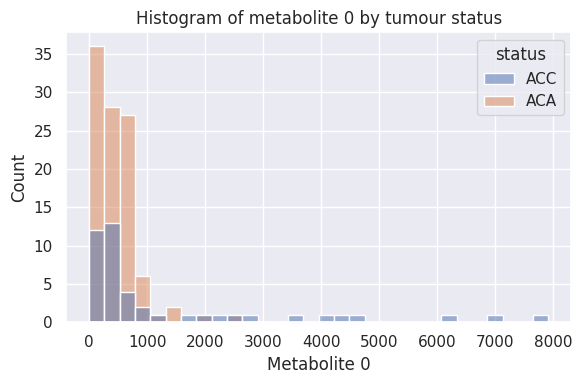

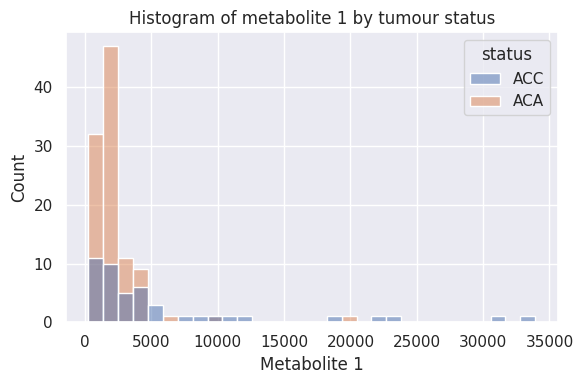

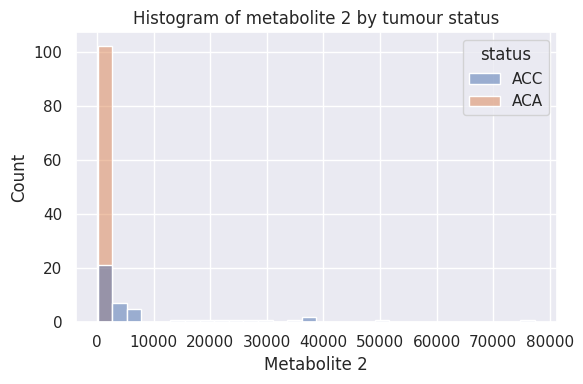

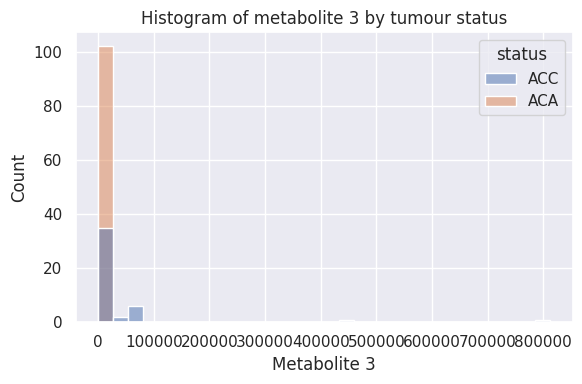

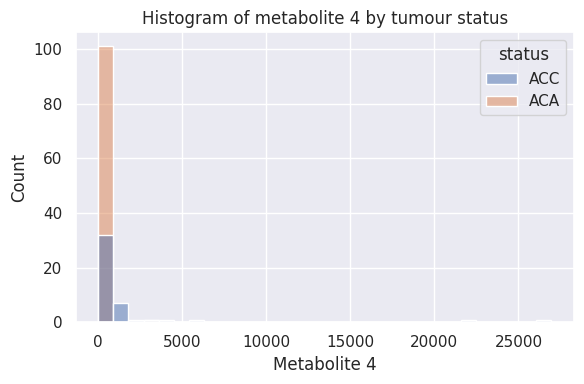

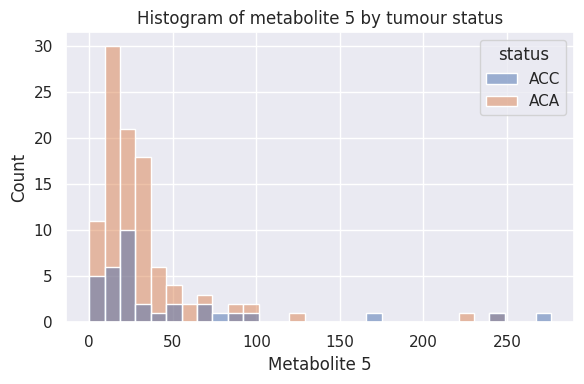

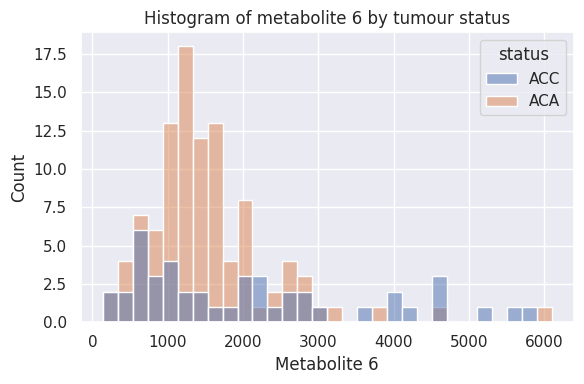

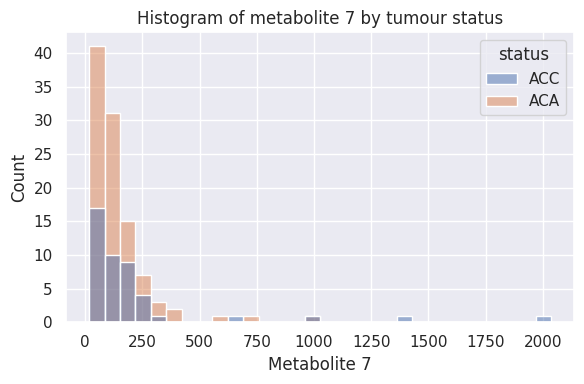

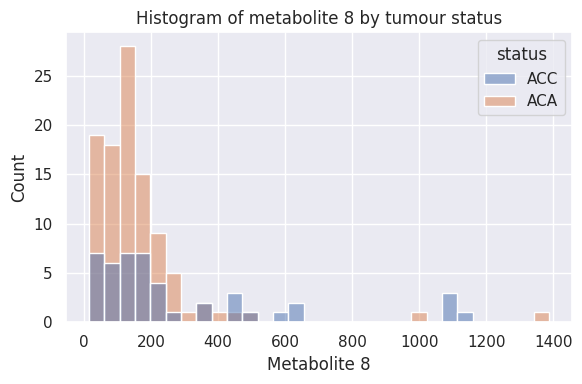

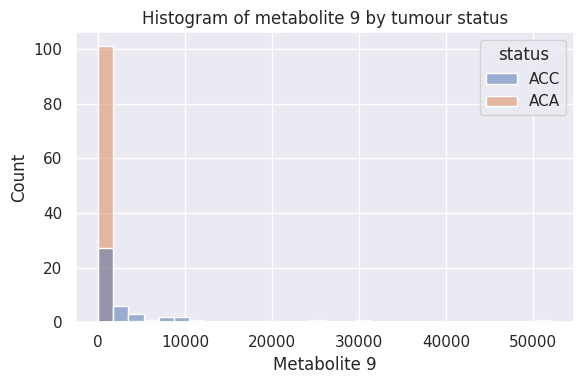

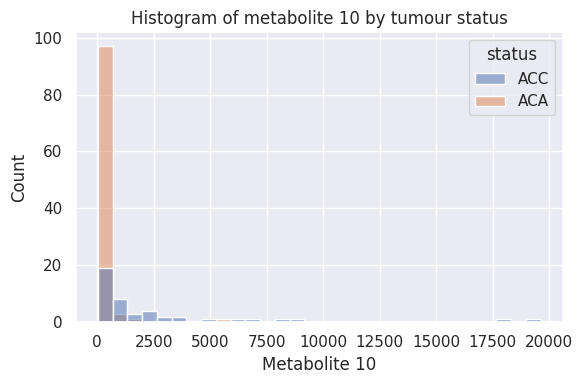

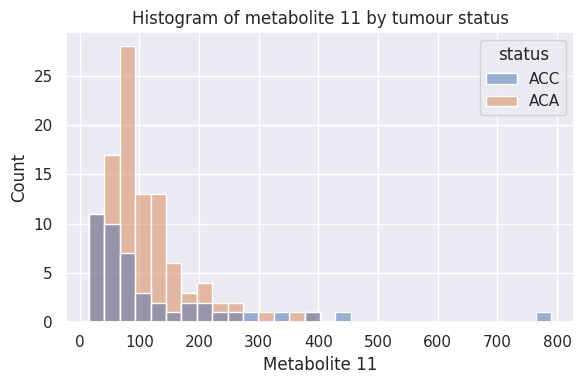

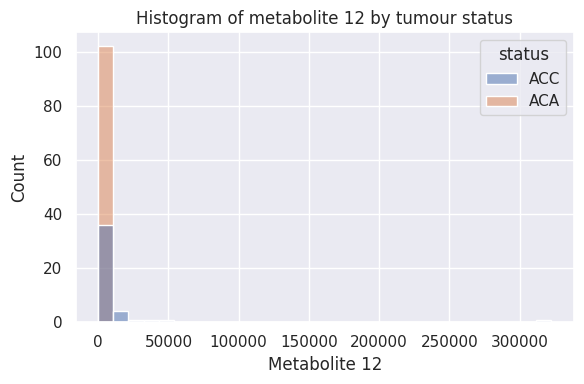

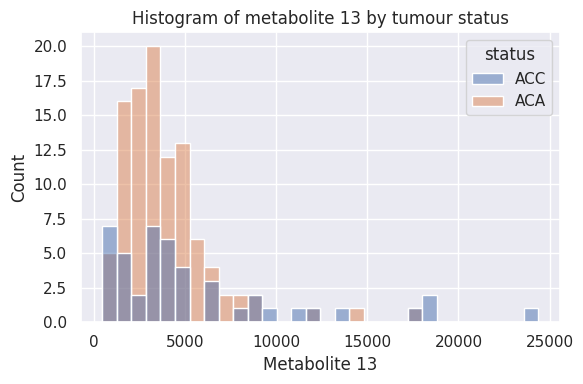

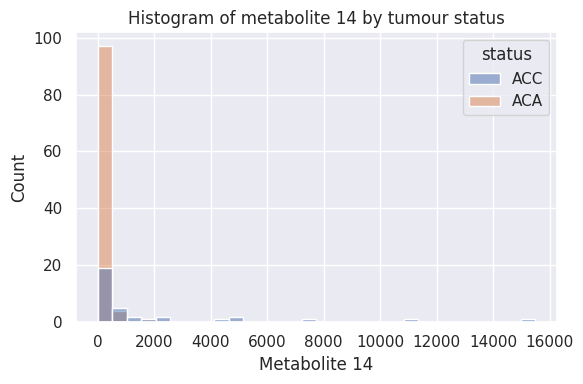

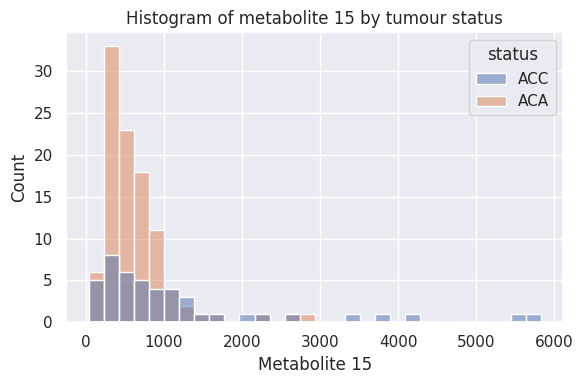

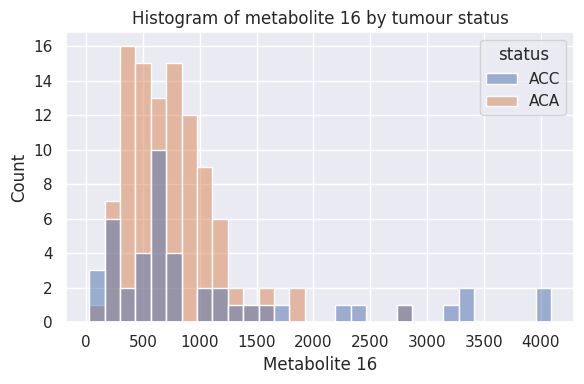

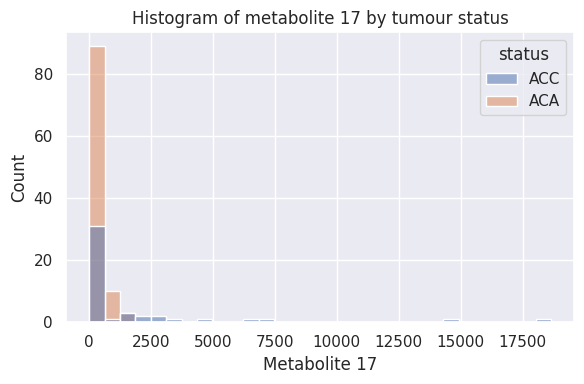

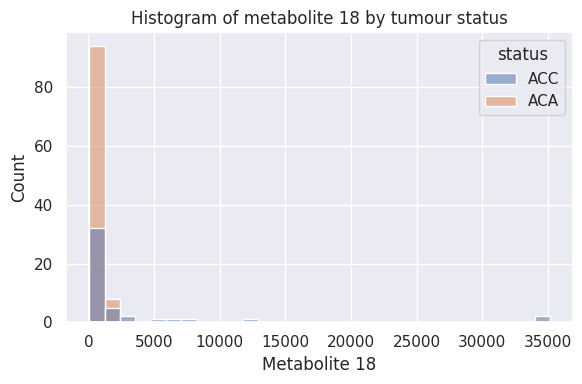

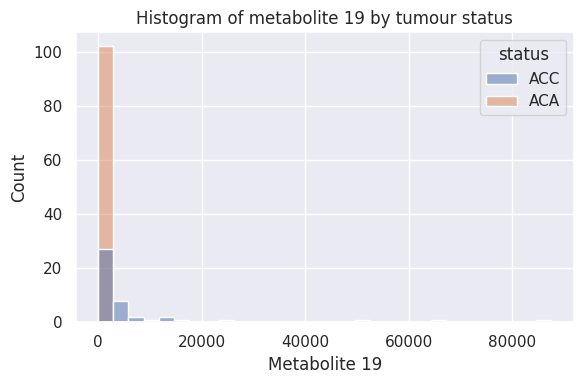

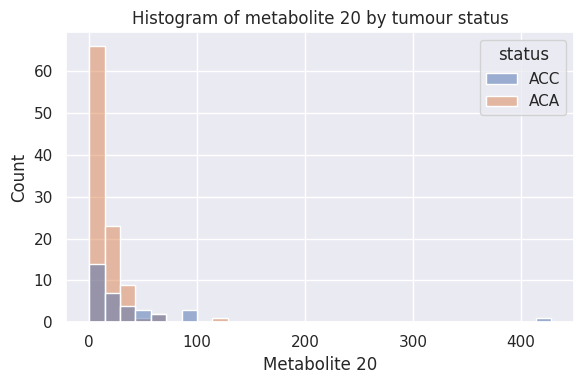

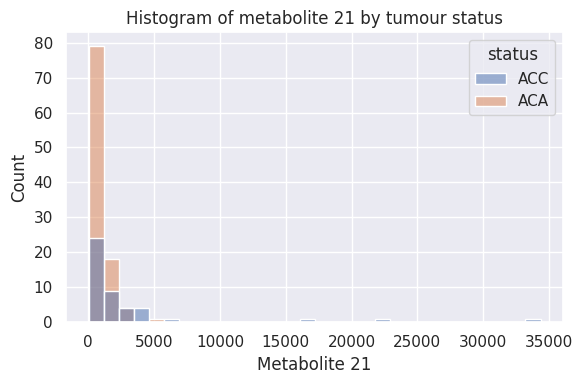

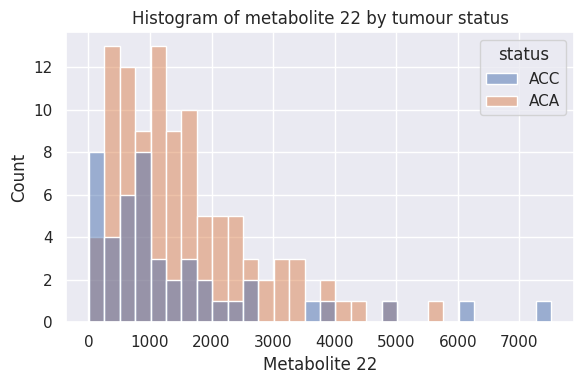

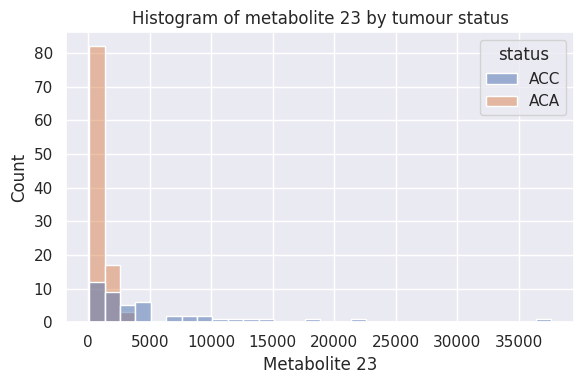

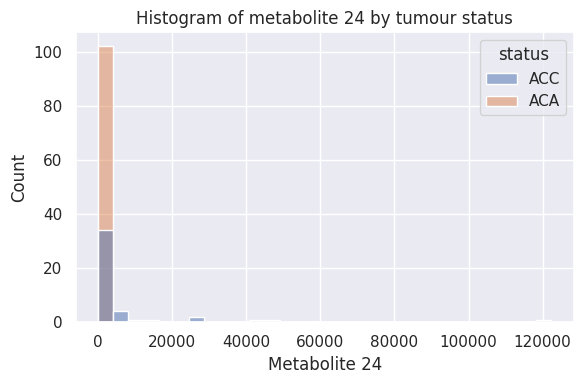

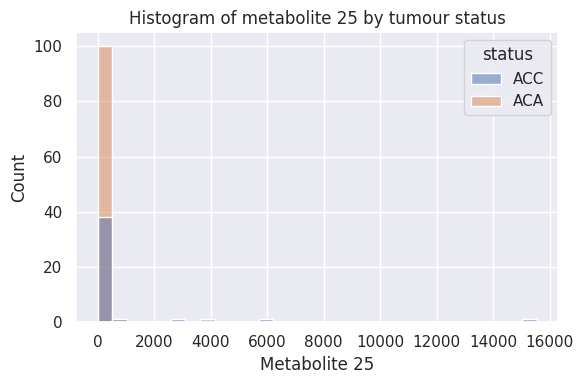

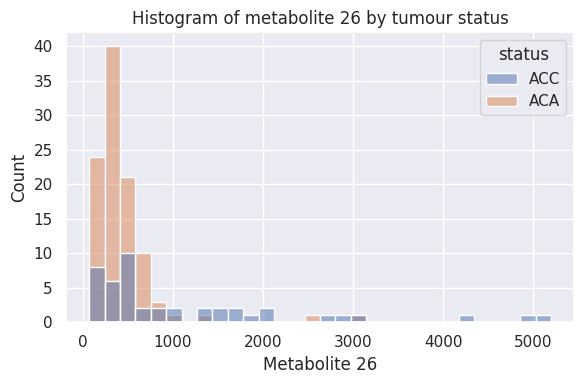

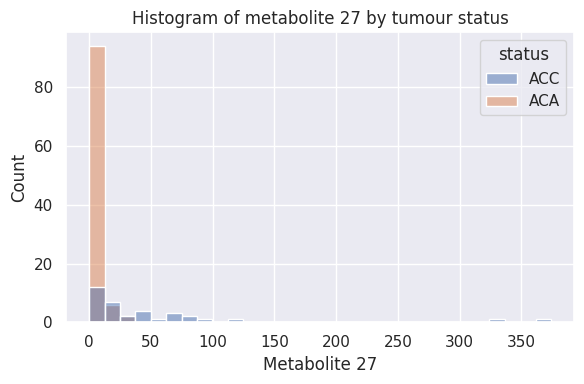

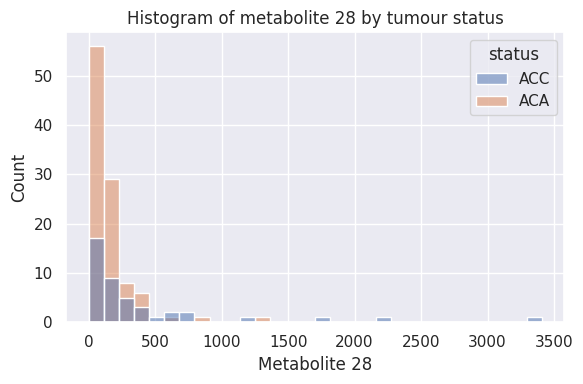

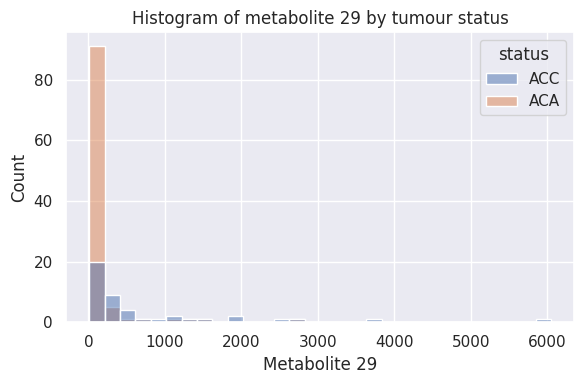

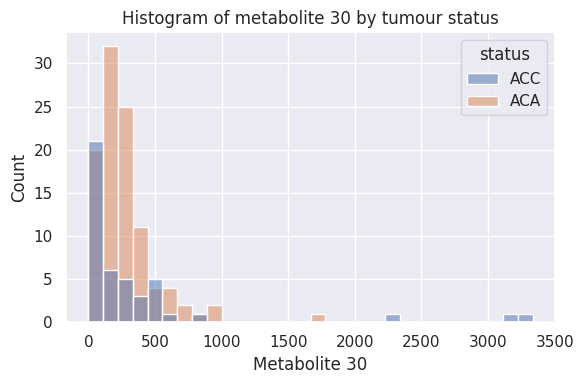

In [12]:
# --- Histograms per variable, separated by tumour status (ACC vs ACA) ---

# We know that the last column is 'status', and the first 32 columns are numeric.
# The exercise asks for 31 variables, so here we use the first 31 numeric columns: 0..30.
feature_cols = df_tumour.columns[:31]  # columns 0,1,...,30

# Loop over each feature and make a histogram with hue = 'status'
for col in feature_cols:
    plt.figure(figsize=(6, 4))

    # Plot histogram for this metabolite, colored by tumour status
    sns.histplot(
        data=df_tumour,
        x=col,                 # current metabolite column
        hue="status",          # ACC vs ACA
        bins=30,               # number of bins (can be adjusted)
        kde=False,             # no density curve, only histogram
        alpha=0.5              # make bars slightly transparent
    )

    plt.title(f"Histogram of metabolite {col} by tumour status")
    plt.xlabel(f"Metabolite {col}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()




5. **  Make a pipeline with the following steps:**
**A. Transform data with the function log(1+x)  (use a FunctionTransformer and np.log1p for this)**
**B. Impute missing values using SimpleImputer**
**C. Scale data to mean 0 and variance 1**
**D. Apply Logistic Regression with parameters “solver = ‘saga’, max_iterations = 10000”** [1]



In [13]:
# --- Imports for the pipeline ---
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- Define features (X) and target (y) ---

# Drop the status column to get only the metabolite features
X = df_tumour.drop(columns=["status"])

# Use the tumour status (ACC / ACA) as the target variable
y = df_tumour["status"]

# --- Define the pipeline ---

pipe = Pipeline(steps=[
    # A. Apply log(1 + x) transformation to all features
    ("log_transform", FunctionTransformer(np.log1p, validate=False)),

    # B. Impute missing values (e.g. with the mean of each feature)
    ("imputer", SimpleImputer(strategy="mean")),

    # C. Scale features to mean 0 and variance 1
    ("scaler", StandardScaler()),

    # D. Logistic Regression classifier
    ("logreg", LogisticRegression(
        solver="saga",   # solver as specified
        max_iter=10000   # note: parameter name is max_iter, not max_iterations
    ))
])

# Now `pipe` is a complete model that can be used with .fit(X, y) and .predict(...)




6.   **Use the code below to calculate the area under the ROC curve using 10-fold cross validation.**[1]
**def score_model(model, X, y):**
  		**scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')**
  		**print("%0.3f AUC with a standard deviation of %0.3f" % (scores.mean(), **scores.std()/np.sqrt(10)))




In [14]:
from sklearn.model_selection import cross_val_score

# --- Define the scoring function (given in the assignment) ---
def score_model(model, X, y):
    """
    Compute 10-fold cross-validated ROC AUC for a given model.
    """
    scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    print("%0.3f AUC with a standard deviation of %0.3f" % (scores.mean(), scores.std() / np.sqrt(10)))

# --- Use the function with our pipeline model ---

score_model(pipe, X, y)


0.979 AUC with a standard deviation of 0.010




7.   **The above performance was obtained using the default regularization strength C=1.  Use model.get_param() to identify the name of this parameter in the pipeline, and use validation_curve to calculate training and validation scores over range C=10^-1.5 to C=10^1.5, with steps 0.25 on the logarithmic scale.  Plot the training and validation curves.**



dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'log_transform', 'imputer', 'scaler', 'logreg', 'log_transform__accept_sparse', 'log_transform__check_inverse', 'log_transform__feature_names_out', 'log_transform__func', 'log_transform__inv_kw_args', 'log_transform__inverse_func', 'log_transform__kw_args', 'log_transform__validate', 'imputer__add_indicator', 'imputer__copy', 'imputer__fill_value', 'imputer__keep_empty_features', 'imputer__missing_values', 'imputer__strategy', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'logreg__C', 'logreg__class_weight', 'logreg__dual', 'logreg__fit_intercept', 'logreg__intercept_scaling', 'logreg__l1_ratio', 'logreg__max_iter', 'logreg__multi_class', 'logreg__n_jobs', 'logreg__penalty', 'logreg__random_state', 'logreg__solver', 'logreg__tol', 'logreg__verbose', 'logreg__warm_start'])
C values: [ 0.03162278  0.05623413  0.1         0.17782794  0.31622777  0.56234133
  1.          1.77827941  3.16227766  5.62341325 10.         17

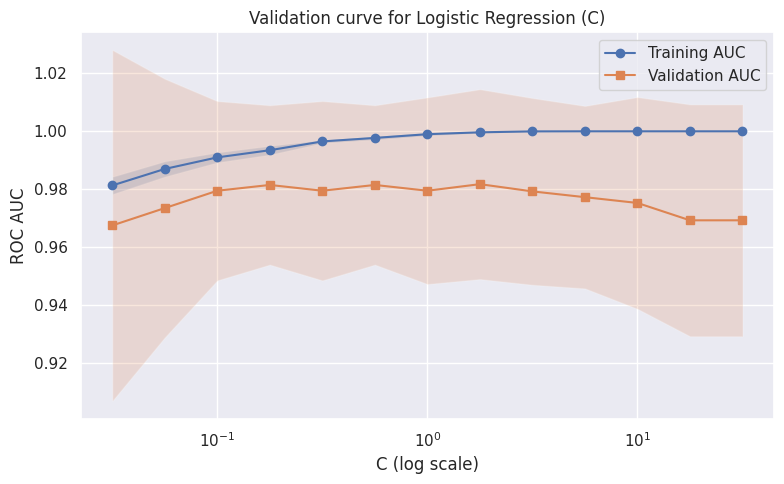

In [15]:
from sklearn.model_selection import validation_curve

# 1. Inspect parameters in the pipeline to find the name of C
#    (in the pipeline, parameters are accessed as '<step_name>__<param_name>')
print(pipe.get_params().keys())

# We expect to see 'logreg__C' in the printed keys. That is the parameter we will vary.

# 2. Define the range of C values on a logarithmic scale
#    exponents: -1.5, -1.25, ..., 1.5  (step size 0.25)
log_C_range = np.arange(-1.5, 1.5 + 0.0001, 0.25)
C_range = 10 ** log_C_range   # convert log10(C) to C

print("C values:", C_range)

# 3. Use validation_curve to compute training and validation scores
train_scores, val_scores = validation_curve(
    estimator=pipe,
    X=X,
    y=y,
    param_name="logreg__C",   # parameter name inside the pipeline
    param_range=C_range,
    scoring="roc_auc",
    cv=10
)

# 4. Compute mean and standard deviation across folds
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

# 5. Plot training and validation curves
plt.figure(figsize=(8, 5))

# Use semilogx because C is on a log scale
plt.semilogx(C_range, train_mean, marker="o", label="Training AUC")
plt.semilogx(C_range, val_mean, marker="s", label="Validation AUC")

# Optionally add error bands (± 1 std)
plt.fill_between(C_range, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(C_range, val_mean - val_std, val_mean + val_std, alpha=0.2)

plt.xlabel("C (log scale)")
plt.ylabel("ROC AUC")
plt.title("Validation curve for Logistic Regression (C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




8.   **Use “model.set_params( … ) to set the parameter regularization strength to 10-0.75, and use score_model to calculate the ROCAUC for this setting.**

In [16]:
# --- Set regularization strength C to 10**-0.75 and evaluate ---
# Set the C parameter of the Logistic Regression step inside the pipeline
pipe.set_params(logreg__C=10**-0.75)

# Check that the parameter was set correctly (optional)
print("Current C:", pipe.get_params()["logreg__C"])

# Evaluate the model with 10-fold cross-validated ROC AUC
score_model(pipe, X, y)


Current C: 0.1778279410038923
0.981 AUC with a standard deviation of 0.009




9.   **Make a new pipeline, now using L1 regularization (penalty = ‘l1’), and plot another validation curve.  Do you get better results with L1 regularization?**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Features and target (same as before)
X = df_tumour.drop(columns=["status"])
y = df_tumour["status"]

# --- Define a new pipeline with L1 penalty ---

pipe_l1 = Pipeline(steps=[
    # A. Apply log(1 + x) transformation
    ("log_transform", FunctionTransformer(np.log1p, validate=False)),

    # B. Impute missing values
    ("imputer", SimpleImputer(strategy="mean")),

    # C. Scale to mean 0, variance 1
    ("scaler", StandardScaler()),

    # D. Logistic Regression with L1 regularization
    ("logreg", LogisticRegression(
        penalty="l1",
        solver="saga",    # saga supports L1
        max_iter=10000
    ))
])


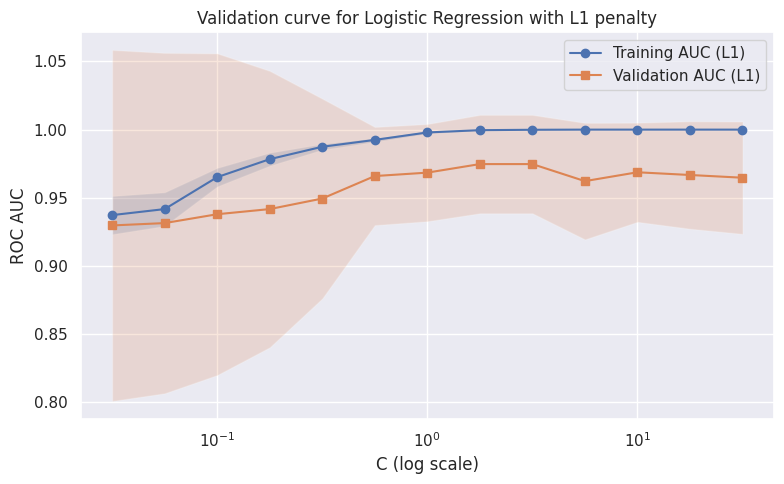

In [18]:
# Same C range: 10^(-1.5) ... 10^(1.5) step 0.25 in log10
log_C_range = np.arange(-1.5, 1.5 + 0.0001, 0.25)
C_range = 10 ** log_C_range

# Compute training and validation scores
train_scores_l1, val_scores_l1 = validation_curve(
    estimator=pipe_l1,
    X=X,
    y=y,
    param_name="logreg__C",
    param_range=C_range,
    scoring="roc_auc",
    cv=10
)

train_mean_l1 = train_scores_l1.mean(axis=1)
train_std_l1  = train_scores_l1.std(axis=1)

val_mean_l1 = val_scores_l1.mean(axis=1)
val_std_l1  = val_scores_l1.std(axis=1)

# Plot validation curve for L1
plt.figure(figsize=(8, 5))
plt.semilogx(C_range, train_mean_l1, marker="o", label="Training AUC (L1)")
plt.semilogx(C_range, val_mean_l1, marker="s", label="Validation AUC (L1)")

plt.fill_between(C_range, train_mean_l1 - train_std_l1, train_mean_l1 + train_std_l1, alpha=0.2)
plt.fill_between(C_range, val_mean_l1 - val_std_l1, val_mean_l1 + val_std_l1, alpha=0.2)

plt.xlabel("C (log scale)")
plt.ylabel("ROC AUC")
plt.title("Validation curve for Logistic Regression with L1 penalty")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From the validation curve with L1 regularization, the best validation ROC AUC is
around 0.97–0.98, which is slightly lower than the best AUC we obtained with L2
regularization (~0.981). Therefore, L1 regularization does not clearly improve
the predictive performance on this dataset (although it may still be useful for
sparsity / feature selection).




10.   **Identify the best parameter for L1 regularization.  Set C to this optimal value, and fit the pipeline to the data again.  Extract the coefficients of the model, using “pipeline[-1].coef_”.  How many parameters have been shrunk to 0?**

In [19]:
# 1) Find the best C from the L1 validation curve (highest validation AUC)
best_idx_l1 = np.argmax(val_mean_l1)     # index of best validation score
best_C_l1 = C_range[best_idx_l1]        # corresponding C value

print("Best C for L1 regularization:", best_C_l1)
print("Best validation AUC (L1):", val_mean_l1[best_idx_l1])

# 2) Set this C in the L1 pipeline and fit on the full dataset
pipe_l1.set_params(logreg__C=best_C_l1)
pipe_l1.fit(X, y)

# 3) Extract coefficients and count how many are exactly zero
# pipeline[-1] is the last step, i.e. the LogisticRegression model
coefs = pipe_l1[-1].coef_[0]    # binary classification -> one row of coefficients

num_zero = np.sum(coefs == 0)
num_total = coefs.size

print("Number of coefficients shrunk to 0:", num_zero)
print("Total number of coefficients:", num_total)


Best C for L1 regularization: 1.7782794100389228
Best validation AUC (L1): 0.9747272727272727
Number of coefficients shrunk to 0: 13
Total number of coefficients: 32


For L1 regularization, the optimal value of C (based on the validation curve) is
C ≈ 1.78, with a best validation ROC AUC of about 0.975.

After refitting the L1-regularized pipeline with this C, the logistic regression
model has 32 coefficients in total, of which 13 are exactly zero. So 13
parameters have been shrunk to 0.




11.   **Build a third pipeline, now replacing the logistic regression with a random forest classifier.  Use the parameter max_depth=3.  Run score_model to find how well this model does.  How does it compare to logistic regression with L1 or L2 regularization?**

In [20]:
from sklearn.ensemble import RandomForestClassifier

# --- Third pipeline: Random Forest with max_depth=3 ---

pipe_rf = Pipeline(steps=[
    # A. log(1 + x) transformation
    ("log_transform", FunctionTransformer(np.log1p, validate=False)),

    # B. Impute missing values
    ("imputer", SimpleImputer(strategy="mean")),

    # C. Standardize features
    ("scaler", StandardScaler()),

    # D. Random Forest classifier
    ("rf", RandomForestClassifier(
        max_depth=3,
        n_estimators=100,
        random_state=42
    ))
])

# Evaluate with 10-fold ROC AUC
score_model(pipe_rf, X, y)


0.966 AUC with a standard deviation of 0.022


The random forest pipeline with max_depth = 3 achieves
about 0.966 ROC AUC (sd ≈ 0.022).

This is clearly worse than logistic regression with L2
regularization (AUC ≈ 0.981) and also worse than logistic
regression with L1 regularization (best AUC ≈ 0.975).

So in this dataset, regularized logistic regression (both
L1 and L2) outperforms the shallow random forest classifier.
